In [1]:
from kalkulator import Kalkulator
from mytypes import *

In [2]:
ile=20

kredyt=450000

bgk=7.14
r1=7.14
r3=9

kredyt1=Kalkulator(kwota_kredytu=kredyt,ilosc_lat=ile,stopa_procentowa=r1,rodzaj_rat=RodzajRat.bezpieczny,wskaznikBGK=bgk,stopa_procentowa3=r3)
df=kredyt1.harmonogram_to_DF()
df['Odsetki_po'] = df['Rata odsetkowa']-df['Dopłata']
df['po_laczna'] = df['Rata kapitałowa']+df['Odsetki_po']
df

,Numer raty,Kapitał na początku okresu,Rata kapitałowa,Rata odsetkowa,Dopłata,Rata łączna,Kapitał na koniec okresu,Odsetki_po,po_laczna
0,1,450000.00,1875.00,2677.50,1927.50,4552.50,448125.00,750.00,2625.00
1,2,448125.00,1875.00,2666.34,1919.47,4541.34,446250.00,746.87,2621.87
2,3,446250.00,1875.00,2655.19,1911.44,4530.19,444375.00,743.75,2618.75
3,4,444375.00,1875.00,2644.03,1903.41,4519.03,442500.00,740.62,2615.62
4,5,442500.00,1875.00,2632.87,1895.37,4507.87,440625.00,737.50,2612.50
...,...,...,...,...,...,...,...,...,...
234,235,16662.12,2725.23,124.97,0.00,2850.20,13936.89,124.97,2850.20
235,236,13936.89,2745.67,104.53,0.00,2850.20,11191.22,104.53,2850.20
236,237,11191.22,2766.27,83.93,0.00,2850.20,8424.95,83.93,2850.20
237,238,8424.95,2787.01,63.19,0.00,2850.20,5637.94,63.19,2850.20


In [5]:
kredyt1.totals_to_dict(short=True)

{'total_doplata': 173957, 'total_odsetki': 184691, 'total_raty': 631861}

In [6]:
opcje_dlugosci = range(15,36)

kredyt=450000

bgk=7.14
r1=7.14
r3=9

dlugosci=[]
doplaty=[]
odsetki=[]
raty=[]

for ile in opcje_dlugosci:
    kalk=Kalkulator(kwota_kredytu=kredyt,ilosc_lat=ile,stopa_procentowa=r1,rodzaj_rat=RodzajRat.bezpieczny,wskaznikBGK=bgk,stopa_procentowa3=r3)
    dict=kalk.totals_to_dict(short=True) 
    lista_rat = kalk.raty_to_list()

    dlugosci.append(ile)
    raty.append(lista_rat)
    doplaty.append(dict['total_doplata'])
    odsetki.append(dict['total_odsetki'])


([<matplotlib.axis.YTick at 0x2540dcb5b90>,
 [Text(0, 0, '0'),
  Text(0, 250, '250'),
  Text(0, 500, '500'),
  Text(0, 750, '750'),
  Text(0, 1000, '1000'),
  Text(0, 1250, '1250'),
  Text(0, 1500, '1500'),
  Text(0, 1750, '1750'),
  Text(0, 2000, '2000'),
  Text(0, 2250, '2250'),
  Text(0, 2500, '2500'),
  Text(0, 2750, '2750'),
  Text(0, 3000, '3000'),
  Text(0, 3250, '3250'),
  Text(0, 3500, '3500'),
  Text(0, 3750, '3750'),
  Text(0, 4000, '4000'),
  Text(0, 4250, '4250')])

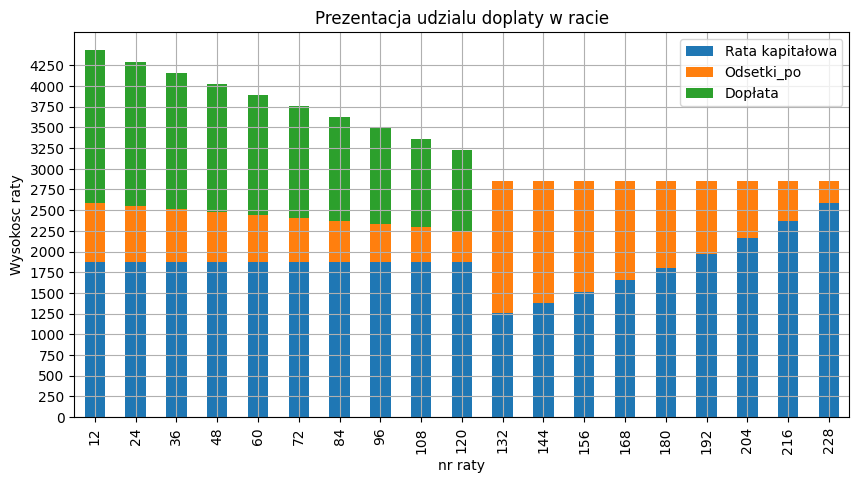

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

show = df[df['Numer raty']%12==0]
show.plot(kind='bar',x='Numer raty',y=['Rata kapitałowa','Odsetki_po','Dopłata'], stacked=True,figsize=(10,5))
plt.title('Prezentacja udzialu doplaty w racie')
plt.xlabel('nr raty')
plt.ylabel('Wysokosc raty')
plt.grid(True)
plt.yticks(range(0,int(show['Rata łączna'].max()),250))

In [10]:
rata1=[x[0] for x in raty]
rata1


[3250,
 3094,
 2956,
 2833,
 2724,
 2625,
 2536,
 2455,
 2380,
 2312,
 2250,
 2192,
 2139,
 2089,
 2043,
 2000,
 1960,
 1922,
 1886,
 1853,
 1821]

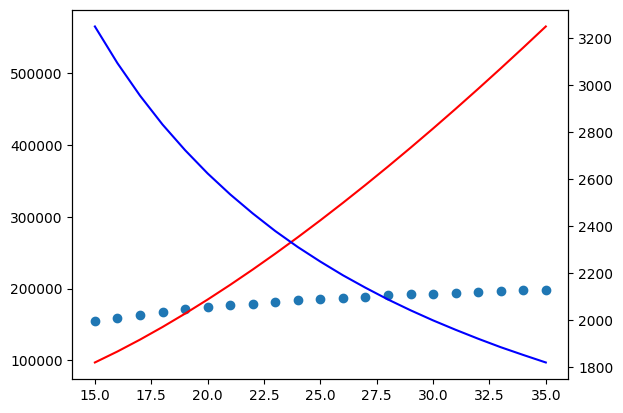

In [12]:
rata1=[x[0] for x in raty]
rata121=[x[0] for x in raty]

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax1.scatter(dlugosci,doplaty)
#dziwne ze doplaty rosna
ax1.plot(dlugosci,odsetki, color='r')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(dlugosci,rata1, color='b')

plt.show()